<a href="https://colab.research.google.com/github/foxtrotmike/CS909/blob/master/molecules_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tutorial: Representing Molecules as Graphs Using PyTorch Geometric**
(Fayyaz Minhas)
## **Introduction**
In cheminformatics and computational biology, molecules can be effectively represented as **graphs**, where:
- **Atoms** are represented as **nodes** with unique features (e.g., atomic identity).
- **Bonds** are represented as **edges** with attributes (e.g., single, double, or triple bonds).

Graph representations allow us to apply **Graph Neural Networks (GNNs)** for molecular property prediction, drug discovery, and structural analysis.
In this tutorial, we demonstrate how to represent **water (H₂O)** and **caffeine (C₈H₁₀N₄O₂)** as graphs using **PyTorch Geometric**.

---

## **Graph Representation Strategy**
We follow a structured approach to convert molecular structures into graphs:

### **1. Nodes (Atoms)**
- Atoms are represented using **one-hot encoding** based on a fixed dictionary (**C, H, O, N, S**).

### **2. Edges (Bonds)**
- Bonds are stored in a **connectivity matrix (`edge_index`)**, which specifies atom connections.
- Bonds are made **bidirectional** to ensure proper graph representation.
- Each bond is assigned a **bond type attribute (`edge_attr`)**.

### **3. Graph Construction**
- We create graphs for **water (H₂O)** and **caffeine (C₈H₁₀N₄O₂)** using the `Data` class from **PyTorch Geometric**.

---

## **Code Implementation**
The following code constructs molecular graphs for **water** and **caffeine**, ensuring that all edges are correctly assigned **bond types** and maintaining a consistent encoding scheme.

This structured representation enables **deep learning models** to process molecular data efficiently for tasks like **predicting solubility, toxicity, and binding affinity**.



In [1]:
!pip install torch-geometric #install pytorch geometric

In [2]:
# code for visalulization

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from torch_geometric.utils import to_networkx

def visualize_molecular_graph(graph):
    """
    Not related to Graph Neural Networks.
    Visualizes a PyTorch Geometric molecular graph with:
    - Node colors based on atom types (one-hot encoded)
    - Edge colors based on bond types (one-hot encoded)
    - Directed edges with arrows

    Parameters:
        graph (torch_geometric.data.Data): The molecular graph to visualize.
    """

    # Convert PyTorch Geometric graph to NetworkX
    G = to_networkx(graph, to_undirected=False)  # Keep directed edges

    # Define colors for node types based on one-hot encoding
    atom_colors = {
        'C': 'black', 'H': 'lightgray', 'O': 'red', 'N': 'blue', 'S': 'yellow'
    }

    # Define colors for edge types based on one-hot encoding
    bond_colors = {
        'single': 'gray', 'double': 'orange', 'triple': 'purple'
    }

    # Extract node features (one-hot encoded)
    node_features = graph.x.numpy()

    # Define atom type from one-hot encoding
    atom_types = ['C', 'H', 'O', 'N', 'S']
    node_colors = []

    for feature in node_features:
        index = np.argmax(feature)  # Find the index of 1 in the one-hot vector
        node_colors.append(atom_colors.get(atom_types[index], 'white'))  # Default to white if unknown

    # Extract edge attributes (one-hot encoding for bonds)
    edge_features = graph.edge_attr.numpy() if graph.edge_attr is not None else None
    edge_colors = []

    if edge_features is not None:
        bond_types = ['single', 'double', 'triple']
        for edge_feature in edge_features:
            index = np.argmax(edge_feature)  # Find bond type
            edge_colors.append(bond_colors.get(bond_types[index], 'black'))  # Default to black
    else:
        edge_colors = ['gray'] * graph.edge_index.shape[1]  # Default gray if no bond info

    # Generate graph layout
    pos = nx.spring_layout(G, seed=42)  # Use spring layout for nice spacing

    # Draw the graph with customized visualization
    plt.figure(figsize=(8, 6))
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=600, edgecolors='black')
    nx.draw_networkx_labels(G, pos, font_size=10, font_color='white', font_weight='bold')

    # Draw directed edges with different colors
    edges = list(G.edges())
    for i, (u, v) in enumerate(edges):
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], edge_color=[edge_colors[i]], width=2, arrows=True, arrowstyle='-|>', arrowsize=15)

    plt.title("Molecular Graph Representation", fontsize=14)
    plt.axis('off')  # Hide axes
    plt.show()



In [3]:
import torch
from torch_geometric.data import Data

# Define common one-hot encoding for atoms [C, H, O, N, S]
atom_dict = {'C': [1, 0, 0, 0, 0],
             'H': [0, 1, 0, 0, 0],
             'O': [0, 0, 1, 0, 0],
             'N': [0, 0, 0, 1, 0],
             'S': [0, 0, 0, 0, 1]}

# Define common bond type encoding
bond_types = {
    'single': [1, 0, 0],
    'double': [0, 1, 0],
    'triple': [0, 0, 1]
}

### ---------------- WATER (H₂O) ---------------- ###
water_nodes = torch.tensor([
    atom_dict['O'],  # Oxygen (O)
    atom_dict['H'],  # Hydrogen (H)
    atom_dict['H']   # Hydrogen (H)
], dtype=torch.float)

# Define O-H bonds and make them bidirectional
water_edges = [[0, 1], [0, 2]]
water_edges_bidirectional = water_edges + [[b, a] for (a, b) in water_edges]
water_edge_index = torch.tensor(water_edges_bidirectional, dtype=torch.long).t().contiguous()

# Define edge attributes (single bonds)
water_edge_attr = torch.tensor([bond_types['single']] * len(water_edges), dtype=torch.float)
water_edge_attr = torch.cat([water_edge_attr, water_edge_attr], dim=0)  # Duplicate for bidirectionality

# Create Water Graph
water_graph = Data(x=water_nodes, edge_index=water_edge_index, edge_attr=water_edge_attr)


### ---------------- FIXED CAFFEINE (C₈H₁₀N₄O₂) ---------------- ###
caffeine_nodes = torch.tensor([
    atom_dict['C'], atom_dict['C'], atom_dict['C'], atom_dict['C'],  # Carbon ring
    atom_dict['C'], atom_dict['C'], atom_dict['C'], atom_dict['C'],  # More Carbon
    atom_dict['N'], atom_dict['N'], atom_dict['N'], atom_dict['N'],  # Nitrogen
    atom_dict['O'], atom_dict['O'],                                  # Oxygen
    atom_dict['H'], atom_dict['H'], atom_dict['H'], atom_dict['H'],  # Hydrogen
    atom_dict['H'], atom_dict['H'], atom_dict['H'], atom_dict['H'], atom_dict['H'], atom_dict['H']
], dtype=torch.float)

# Define caffeine molecular bonds (edges)
caffeine_edges = [
    [0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 0],  # Six-membered ring
    [1, 6], [6, 7], [7, 3],                          # Five-membered ring
    [6, 8], [7, 9], [2, 10], [4, 11],                # Nitrogen bonds
    [5, 12], [3, 13],                                # Oxygen bonds
    [0, 14], [0, 15], [5, 16], [5, 17], [6, 18],     # Hydrogen bonds
    [7, 19], [7, 20], [10, 21], [11, 22], [4, 23]    # Fixed: Added connection for node 23!
]

# Convert to bidirectional edges
caffeine_edges_bidirectional = caffeine_edges + [[b, a] for (a, b) in caffeine_edges]
caffeine_edge_index = torch.tensor(caffeine_edges_bidirectional, dtype=torch.long).t().contiguous()

# Define bond types (single & double)
caffeine_edge_attr = torch.tensor([
    bond_types['single'], bond_types['double'], bond_types['single'], bond_types['double'], bond_types['single'], bond_types['double'],  # Six-membered ring
    bond_types['single'], bond_types['single'], bond_types['single'],  # Five-membered ring
    bond_types['single'], bond_types['single'], bond_types['double'], bond_types['double'],  # Nitrogen bonds
    bond_types['single'], bond_types['double'],  # Oxygen bonds
    bond_types['single'], bond_types['single'], bond_types['single'], bond_types['single'], bond_types['single'],  # Hydrogen bonds
    bond_types['single'], bond_types['single'], bond_types['single'], bond_types['single'], bond_types['single']  # Fixed: Added bond for node 23
], dtype=torch.float)

# Duplicate for bidirectional edges
caffeine_edge_attr = torch.cat([caffeine_edge_attr, caffeine_edge_attr], dim=0)

# Create Caffeine Graph
caffeine_graph = Data(x=caffeine_nodes, edge_index=caffeine_edge_index, edge_attr=caffeine_edge_attr)

### ---------------- PRINT RESULTS ---------------- ###
print("Water Graph:", water_graph)
print("Caffeine Graph:", caffeine_graph)


Water Graph: Data(x=[3, 5], edge_index=[2, 4], edge_attr=[4, 3])
Caffeine Graph: Data(x=[24, 5], edge_index=[2, 50], edge_attr=[50, 3])


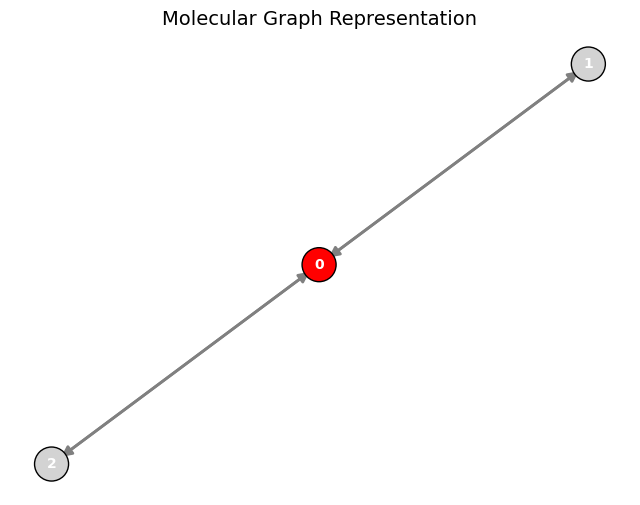

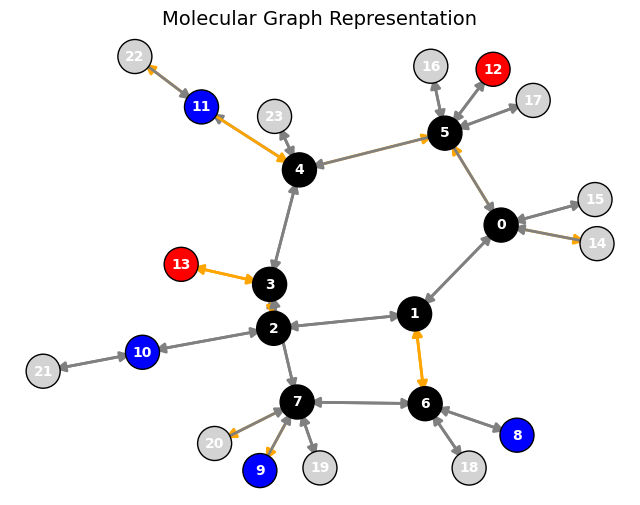

In [4]:
visualize_molecular_graph(water_graph)
visualize_molecular_graph(caffeine_graph)